<a href="https://colab.research.google.com/github/RahulTechTutorials/Deep_learning/blob/master/Reuters_newswires_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##Importing all the libraries, Keras, Matplotlib, Numpy 
import keras
from keras.datasets import reuters
import matplotlib.pyplot as plt
from keras import models,layers
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [27]:
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((8982,), (8982,), (2246,), (2246,))

In [0]:
word_dict = reuters.get_word_index()

In [0]:
reverse_dict = dict([(key,word) for (word,key) in word_dict.items()])

In [0]:
news1 = ' '.join([reverse_dict.get(key - 3 , '?') for key in train_data[0]])

In [31]:
news1

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [0]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [0]:
def one_hot_encoding(labels):
  result = np.zeros((len(labels),max(labels)+1))
  for i,key in enumerate(labels):
    result[i,key] = 1
  return result

In [0]:
y_train = one_hot_encoding(train_labels)
y_test = one_hot_encoding(test_labels)

In [67]:
y_train.shape,y_test.shape

((8982, 46), (2246, 46))

In [0]:
##automated way to do one hot encoding 
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)

In [71]:
one_hot_train_labels.shape


(8982, 46)

In [0]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [0]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

In [0]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [82]:
history = model.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512,validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 195us/step - loss: 2.7783 - acc: 0.5021 - val_loss: 1.8357 - val_acc: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 184us/step - loss: 1.4835 - acc: 0.6922 - val_loss: 1.3450 - val_acc: 0.7000
Epoch 3/20
7982/7982 [==============================] - 1s 185us/step - loss: 1.0786 - acc: 0.7727 - val_loss: 1.1508 - val_acc: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.8463 - acc: 0.8222 - val_loss: 1.0430 - val_acc: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 185us/step - loss: 0.6728 - acc: 0.8596 - val_loss: 0.9650 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 2s 188us/step - loss: 0.5374 - acc: 0.8884 - val_loss: 0.9397 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.4358 - acc: 0.9089 - val_loss: 0.8882 - val_acc: 0.8180


In [0]:
accuracy = history.history['acc']
loss = history.history['loss']
val_accuracy = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = list(range(1,21))

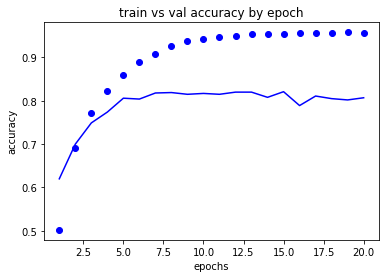

In [88]:
plt.plot(epochs,accuracy,'bo',label = 'train_accuracy')
plt.plot(epochs,val_accuracy,'b',label = 'validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('train vs val accuracy by epoch')
plt.show()

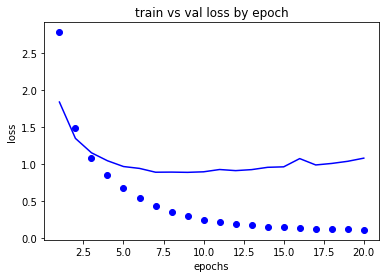

In [89]:
plt.plot(epochs,loss,'bo',label = 'train_loss')
plt.plot(epochs,val_loss,'b',label = 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('train vs val loss by epoch')
plt.show()

In [90]:
## By looking at the plots, we can see that after 9 epochs, the model started getting overfit, so we will train our model for 9 epochs

model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs = 9, batch_size = 512,validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 200us/step - loss: 2.8535 - acc: 0.4022 - val_loss: 1.9506 - val_acc: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 170us/step - loss: 1.5744 - acc: 0.6898 - val_loss: 1.3817 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 2s 188us/step - loss: 1.1286 - acc: 0.7676 - val_loss: 1.1845 - val_acc: 0.7390
Epoch 4/9
7982/7982 [==============================] - 2s 190us/step - loss: 0.8774 - acc: 0.8226 - val_loss: 1.0474 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 2s 189us/step - loss: 0.6982 - acc: 0.8559 - val_loss: 0.9800 - val_acc: 0.8030
Epoch 6/9
7982/7982 [==============================] - 2s 190us/step - loss: 0.5531 - acc: 0.8899 - val_loss: 0.9446 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 2s 190us/step - loss: 0.4479 - acc: 0.9100 - val_loss: 0.9432 - val_acc: 0.8090
Epoch 8

In [92]:
results = model.evaluate(X_test,y_test)

2246/2246 [==============================] - 0s 133us/step


In [100]:
results

[0.9764160717159961, 0.7920747996703493]

In [0]:
predictions = model.predict(X_test)

In [105]:
predictions[0]

array([5.8378946e-06, 1.6278376e-04, 8.2622268e-05, 6.5313864e-01,
       3.3258280e-01, 2.7940439e-06, 4.4886558e-05, 1.0245384e-05,
       3.4673163e-03, 1.4303860e-05, 4.1804215e-05, 8.9201040e-04,
       9.7792399e-05, 8.4639213e-04, 1.3177734e-05, 4.7693993e-05,
       1.4548802e-03, 3.8567715e-04, 1.7637762e-05, 2.4410430e-03,
       2.3547267e-03, 1.6151174e-04, 1.9043858e-06, 4.6159774e-05,
       5.2084638e-06, 9.4833915e-05, 6.1489336e-06, 1.5740932e-06,
       2.4453804e-04, 1.1418739e-04, 3.0849962e-05, 7.9712830e-05,
       2.1582030e-04, 1.5677479e-05, 1.2814868e-05, 7.4484528e-06,
       3.1020056e-04, 4.9422351e-06, 1.2923015e-05, 3.2144223e-04,
       2.2132204e-05, 1.1627941e-04, 5.4149463e-05, 1.1431209e-05,
       1.7739811e-06, 1.2259903e-06], dtype=float32)

In [106]:
np.sum(predictions[0])

1.0

In [107]:
np.argmax(predictions[0])

3

In [112]:
train_labels[0]

3

In [0]:
###one more thing to note, Since we had used categorical_corssentropy loss function, we had to use one hot encoding, if we had used sparse_categorical_crossentropy
##then we dont need to do one_hot_encoding
